# Importing Libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dataframe

In [148]:
chicago_data = pd.read_csv('assignment.csv')
chicago_data

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


#Important Data Points


In [149]:
print('Number of Instances: ' + str(chicago_data.shape[0]))
print('Number of Columns: ' + str(chicago_data.shape[1]))
print(chicago_data.columns)
#Useful Dataframes split using Node Status
chicago_survived = chicago_data[chicago_data.status == 1]
chicago_not_survived = chicago_data[chicago_data.status == 2]
print('Patient survived 5 years or longer:' , chicago_survived.shape)
print('Patient died within 5 year:' , chicago_not_survived.shape)

Number of Instances: 306
Number of Columns: 4
Index(['age', 'year', 'nodes', 'status'], dtype='object')
Patient survived 5 years or longer: (225, 4)
Patient died within 5 year: (81, 4)


In [150]:
chicago_data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Patient Age Distribution

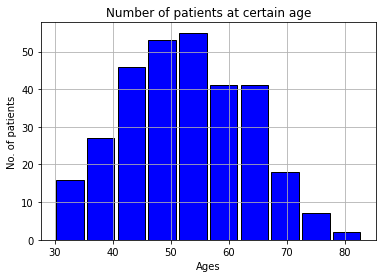

In [151]:
lst = chicago_data['age']
colors = ['blue']
plt.hist(lst,color = colors , histtype = 'bar', rwidth = 0.9, edgecolor="black")
plt.xlabel("Ages")
plt.ylabel("No. of patients")
plt.title("Number of patients at certain age")
plt.grid()
plt.show()

#Detection of Nodes across the Years.
-Sorting Dataframe according to year.

-Representing number of nodes identified accross the years using histogram.

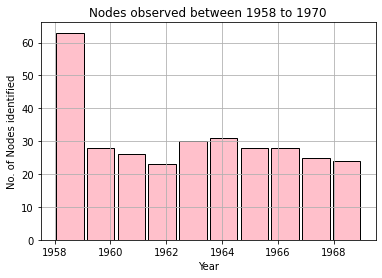

In [152]:
work_df = chicago_data.sort_values(by=['year'], ascending=True)
work_df['year'] += 1900

x = pd.Series(work_df['year']) 
plt.xlabel("Year")
plt.ylabel("No. of Nodes identified")
colors = ['pink']
plt.hist(x,color = colors,histtype = 'bar',rwidth =0.9, edgecolor="black")
plt.title("Nodes observed between 1958 to 1970")
plt.grid()
plt.show() 

# Survival in relation with Nodes and Age

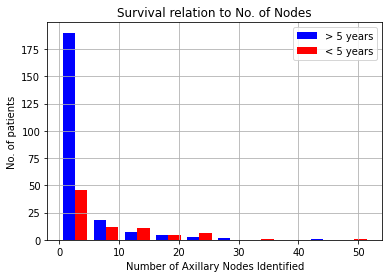

In [155]:
plt.hist([chicago_survived['nodes'],chicago_not_survived['nodes']], color = ["blue", "red"])
plt.ylabel('No. of patients')
plt.xlabel('Number of Axillary Nodes Identified')
plt.title("Survival relation to No. of Nodes")
plt.grid()
plt.legend(['> 5 years', '< 5 years'],loc ="upper right")
plt.show()

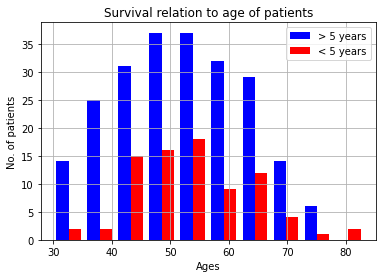

In [154]:
plt.hist([chicago_survived['age'],chicago_not_survived['age']], color = ["blue", "red"])
plt.ylabel('No. of patients')
plt.xlabel('Ages')
plt.title("Survival relation to age of patients")
plt.grid()
plt.legend(['> 5 years', '< 5 years'],loc ="upper right")
plt.show()

# Nodes found at certain Ages

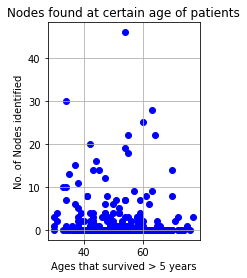

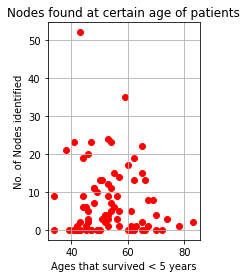

In [156]:
plt.subplot( 1,2, 1)
plt.scatter(chicago_survived['age'], chicago_survived['nodes'], color = 'blue')
plt.ylabel('No. of Nodes identified')
plt.xlabel('Ages that survived > 5 years')
plt.title("Nodes found at certain age of patients")
plt.grid()
plt.show()
plt.subplot( 1, 2, 2)
plt.scatter(chicago_not_survived['age'], chicago_not_survived['nodes'], color = 'red')
plt.ylabel('No. of Nodes identified')
plt.xlabel('Ages that survived < 5 years')
plt.title("Nodes found at certain age of patients")
plt.grid()
plt.show()

# PDFs and CDFs

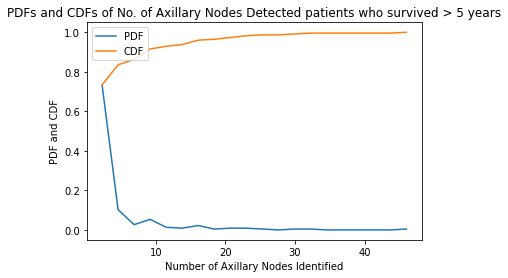

In [157]:
counts_survived, binEdges_survived = np.histogram(chicago_survived.nodes, bins = 20, density = True)
pdf_survived = counts_survived / sum(counts_survived)
cdf_survived = np.cumsum(pdf_survived)

plt.plot(binEdges_survived[1:], pdf_survived)
plt.plot(binEdges_survived[1:], cdf_survived)

plt.ylabel('PDF and CDF')
plt.xlabel('Number of Axillary Nodes Identified')
plt.title("PDFs and CDFs of No. of Axillary Nodes Detected patients who survived > 5 years")
plt.legend(['PDF', 'CDF'],loc = "upper left")
plt.show()

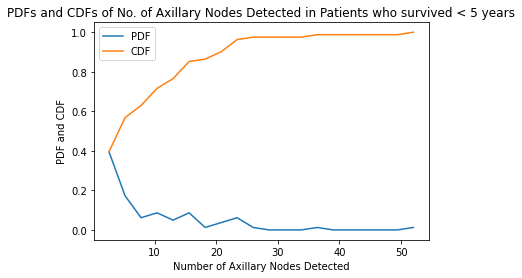

In [161]:
counts_not_survived, binEdges_ns = np.histogram(chicago_not_survived.nodes, bins = 20, density = True)
pdf_not_survived = counts_not_survived / sum(counts_not_survived)
cdf_not_survived = np.cumsum(pdf_not_survived)

plt.plot(binEdges_ns[1:], pdf_not_survived)
plt.plot(binEdges_ns[1:], cdf_not_survived)

plt.ylabel('PDF and CDF')
plt.xlabel('Number of Axillary Nodes Detected')
plt.title("PDFs and CDFs of No. of Axillary Nodes Detected in Patients who survived < 5 years")
plt.legend(['PDF', 'CDF'],loc ="upper left")
plt.show()

#Survival Chart


In [162]:
print('Patients survived 5 years or longer:',chicago_survived['nodes'].count())
print('Patients died within 5 years:',chicago_not_survived['nodes'].count())

Patients survived 5 years or longer: 225
Patients died within 5 years: 81


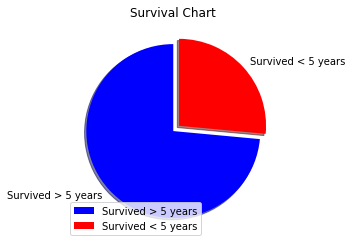

In [163]:
labels = 'Survived > 5 years','Survived < 5 years'
sizes = [chicago_survived['nodes'].count() , chicago_not_survived['nodes'].count()]
colors = ['blue','red']
explode = (0, 0.09)

plt.pie(sizes,explode= explode,labels=labels, colors=colors, shadow=True, startangle=90)
plt.legend()
plt.title('Survival Chart')
plt.show()

# Conclusion
We performed Data Analysis on the given dataset & represented various graphs and plots consisting datapoints of the case study.